In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\khanh\AppData\Local\Temp\ipykernel_4052\694500839.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Visualise metrics across different models with different learning rate (validation and test set)


In [ ]:
# # Read csv file
df_test = pd.read_csv('test_CoxaAI_experiments(new_binary).csv')
df_val = pd.read_csv('val_CoxaAI_experiments(new_binary).csv')

df_val

,Model,epochs,AUC,roc_auc,BinaryCrossentropy,BinaryAccuracy,mcc,f1,f1_0
0,b1_0005,27,0.975,0.976,0.209,0.910,0.818,0.923,0.893
1,b2_0005,44,0.962,0.968,0.328,0.917,0.831,0.927,0.902
2,b3_0005,47,0.969,0.973,0.269,0.912,0.824,0.921,0.902
3,b4_0005,43,0.970,0.971,0.254,0.918,0.832,0.928,0.903
4,b1_001,50,0.973,0.975,0.238,0.908,0.818,0.915,0.900
5,b2_001,43,0.974,0.975,0.233,0.910,0.818,0.923,0.890
6,b3_001,46,0.969,0.971,0.247,0.905,0.806,0.916,0.890
7,b4_001,45,0.973,0.973,0.217,0.914,0.825,0.925,0.900
8,b1_0001,59,0.957,0.967,0.364,0.906,0.810,0.915,0.894
9,b2_0001,38,0.966,0.970,0.300,0.906,0.808,0.918,0.890


In [8]:
df_test

,Model,AUC,roc_auc,BinaryCrossentropy,BinaryAccuracy,mcc,f1,f1_0
0,b1_0005,0.971,0.971,0.222,0.909,0.811,0.925,0.885
1,b2_0005,0.954,0.961,0.390,0.901,0.798,0.915,0.881
2,b3_0005,0.960,0.963,0.365,0.882,0.767,0.897,0.863
3,b4_0005,0.966,0.968,0.258,0.916,0.826,0.929,0.897
4,b1_001,0.973,0.973,0.283,0.891,0.792,0.902,0.876
5,b2_001,0.969,0.971,0.226,0.910,0.812,0.926,0.886
6,b3_001,0.966,0.966,0.260,0.901,0.796,0.916,0.879
7,b4_001,0.969,0.970,0.227,0.906,0.804,0.921,0.884
8,b1_0001,0.944,0.954,0.528,0.881,0.766,0.895,0.863
9,b2_0001,0.959,0.964,0.319,0.898,0.789,0.914,0.875


The code below is inspired by ChatGPT

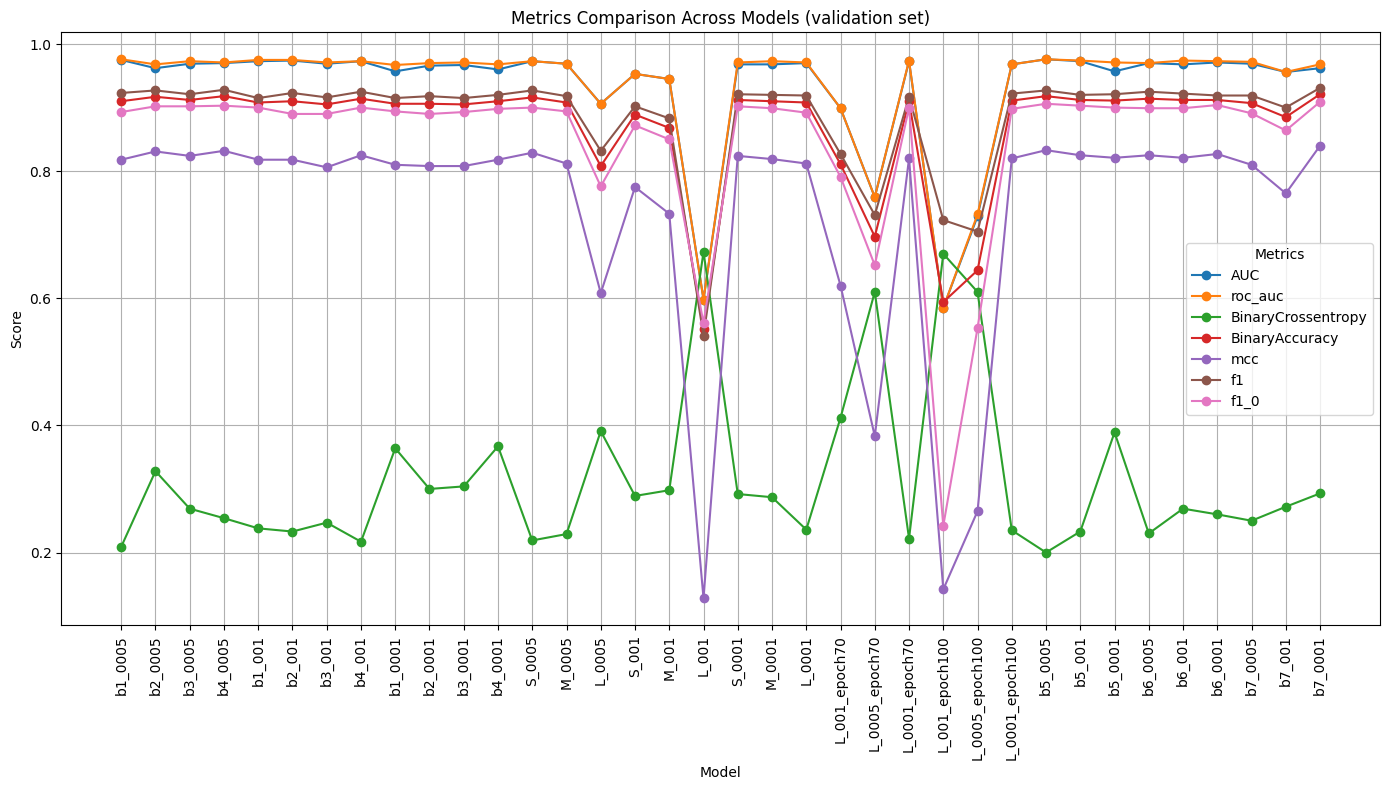

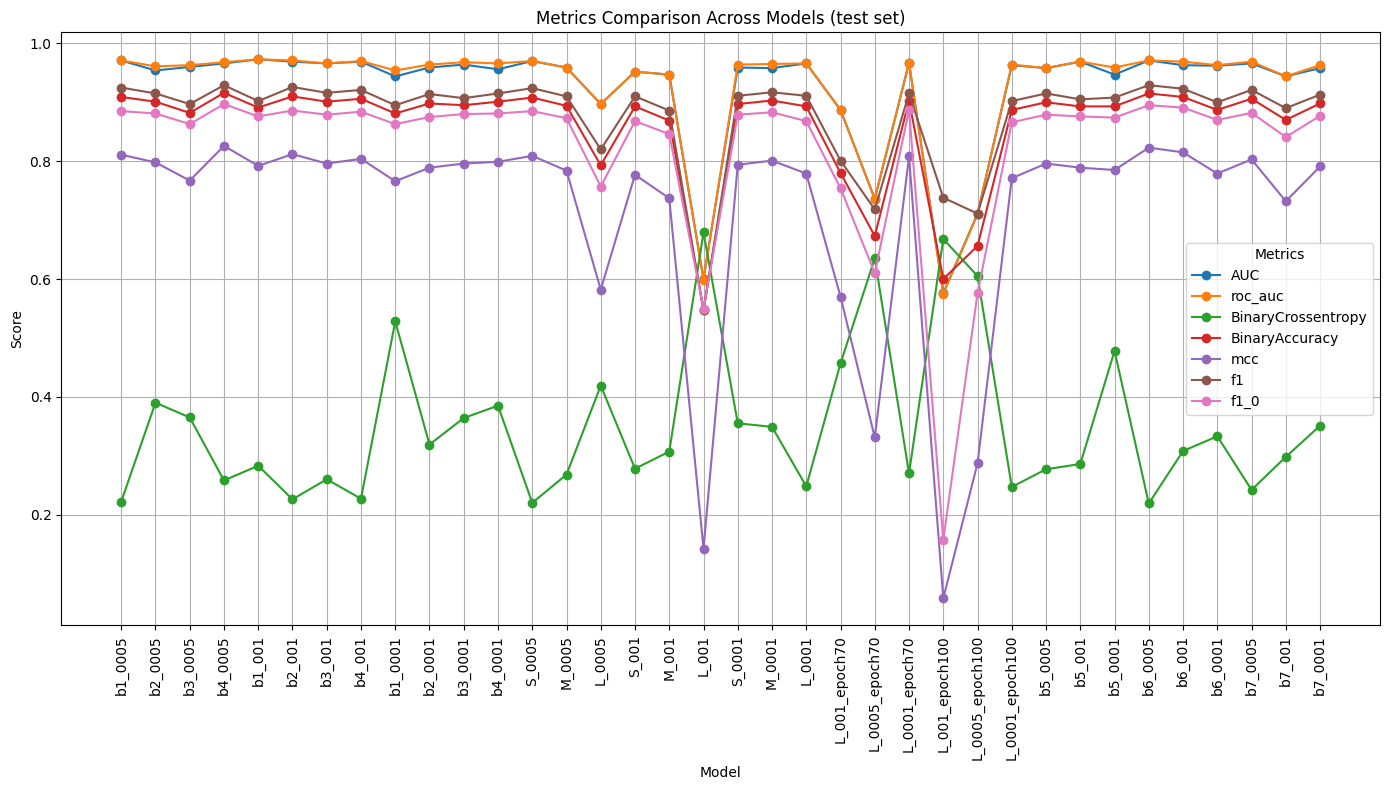

In [3]:
# List of metrics to plot
metrics = ['AUC', 'roc_auc', 'BinaryCrossentropy', 'BinaryAccuracy', 'mcc', 'f1', 'f1_0']



# Plotting all metrics on the same plot
plt.figure(figsize=(14, 8))

for metric in metrics:
    plt.plot(df_val['Model'], df_val[metric], marker='o', label=metric)

plt.title('Metrics Comparison Across Models (validation set)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()




# Plotting all metrics on the same plot
plt.figure(figsize=(14, 8))

for metric in metrics:
    plt.plot(df_test['Model'], df_test[metric], marker='o', label=metric)

plt.title('Metrics Comparison Across Models (test set)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()



In [9]:
# Shows the best model for each metric, except for BinaryCrossentropy (VALIDATION SET)

best_models_val = {}
print('Best model for each metric (validation set):')
for metric in metrics:
    # For binary crossentropy, we want the minimum value
    if metric == 'BinaryCrossentropy':
        best_models_val[metric] = df_val[df_val[metric] == df_val[metric].min()]['Model'].values[0]
    else:
        best_models_val[metric] = df_val[df_val[metric] == df_val[metric].max()]['Model'].values[0]

best_models_val


Best model for each metric (validation set):


{'AUC': 'b5_0005',
 'roc_auc': 'b1_0005',
 'BinaryCrossentropy': 'b5_0005',
 'BinaryAccuracy': 'b7_0001',
 'mcc': 'b7_0001',
 'f1': 'b7_0001',
 'f1_0': 'b7_0001'}

In [11]:


# Shows the best model for each metric, except for BinaryCrossentropy (TEST SET)
best_models_test = {}
print('Best model for each metric (test set):')
for metric in metrics:
    if metric == 'BinaryCrossentropy':
        best_models_test[metric] = df_test[df_test[metric] == df_test[metric].min()]['Model'].values[0]
    else:
        best_models_test[metric] = df_test[df_test[metric] == df_test[metric].max()]['Model'].values[0]


best_models_test


Best model for each metric (test set):


{'AUC': 'b1_001',
 'roc_auc': 'b1_001',
 'BinaryCrossentropy': 'b6_0005',
 'BinaryAccuracy': 'b4_0005',
 'mcc': 'b4_0005',
 'f1': 'b4_0005',
 'f1_0': 'b4_0005'}